In [1]:
import cv2 as cv
import sqlite3
import urllib.request
import numpy as np
from matplotlib import pyplot as plt
import numpy as np
import scipy
#from scipy.misc import imread
import _pickle as pickle
import random
import os
import matplotlib.pyplot as plt
import sqlite3

import imageio

In [3]:
import flickrapi
import urllib
from PIL import Image

# Flickr api access key 
flickr=flickrapi.FlickrAPI('c6a2c45591d4973ff525042472446ca2', '202ffe6f387ce29b', cache=True)


keyword = 'siberian husky'

photos = flickr.walk(text=keyword,
                     tag_mode='all',
                     tags=keyword,
                     extras='url_c',
                     per_page=100,           
                     sort='relevance')

urls = []
for i, photo in enumerate(photos):
    print (i)
    
    url = photo.get('url_c')
    urls.append(url)
    
    # get 50 urls
    if i > 50:
        break

print (urls)

# Download image from the url and save it to '00001.jpg'
urllib.request.urlretrieve(urls[1], '00001.jpg')
urllib.request.urlretrieve(urls[2], '00002.jpg')

# Resize the image and overwrite it
image = Image.open('00001.jpg') 
image = image.resize((256, 256), Image.ANTIALIAS)
image.save('00001.jpg')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
['https://live.staticflickr.com/4064/4716348948_ef8b600421_c.jpg', 'https://live.staticflickr.com/5045/5304597601_760b390089_c.jpg', 'https://live.staticflickr.com/1455/24127228211_815615c242_c.jpg', 'https://live.staticflickr.com/4115/4820216912_e0a47f2e52_c.jpg', 'https://live.staticflickr.com/1915/45023697642_17f100c656_c.jpg', 'https://live.staticflickr.com/3063/3069889769_27852a4bd2_c.jpg', 'https://live.staticflickr.com/3438/3182897813_a47b3a73bb_c.jpg', 'https://live.staticflickr.com/34/224180079_64ab49c8b2_c.jpg', 'https://live.staticflickr.com/8195/8425796674_6e83f6008b_c.jpg', 'https://live.staticflickr.com/2917/14773885795_8397eb0fb3_c.jpg', 'https://live.staticflickr.com/1715/24203807659_55704e2220_c.jpg', 'https://live.staticflickr.com/7282/16243368579_02923d475a_c.jpg', 'https://live.staticflickr.com/600/21726624199_fa3f30f070_c

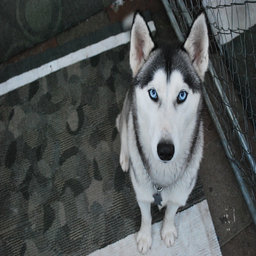

In [5]:
image

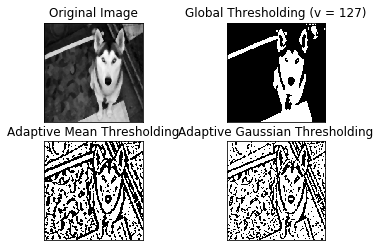

In [11]:
img = cv.imread('00001.jpg',0)
img = cv.medianBlur(img,5)
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()